In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.1'

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'2.4.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
from matplotlib import pyplot as plt
import numpy as np

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

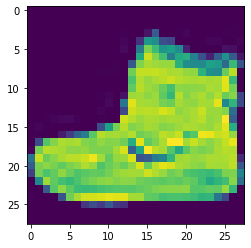

Ankle boot


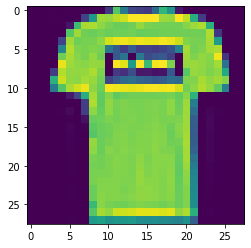

T-shirt/top


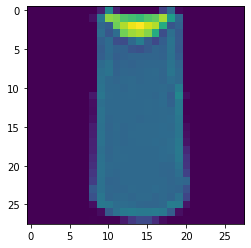

T-shirt/top


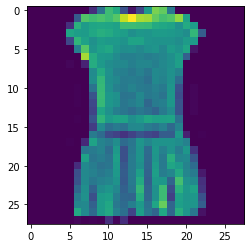

Dress


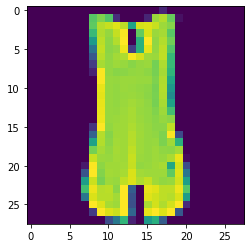

T-shirt/top


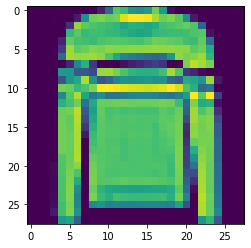

Pullover


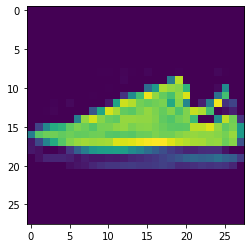

Sneaker


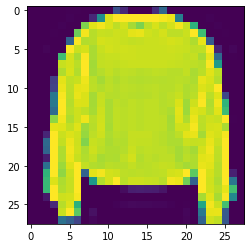

Pullover


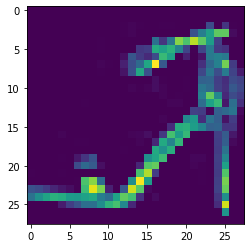

Sandal


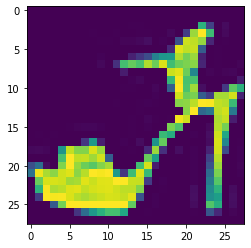

Sandal


In [11]:
for i in np.arange(0,10):
    img = X_train_full[i]
    img = np.array(img, dtype='float')
    plt.imshow(img.reshape((28, 28)))
    plt.show()
    print(class_names[y_train_full[i]])

In [12]:
model = keras.models.Sequential()

In [13]:
model

In [14]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.summary()

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [16]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

In [17]:
history.params

NameError: name 'history' is not defined

In [18]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt

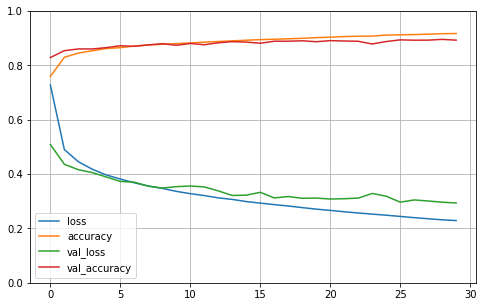

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
1689 * 32

54048

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 940us/step - loss: 62.8068 - accuracy: 0.8468


[62.806819915771484, 0.8468000292778015]

In [41]:
X_new = X_test[:3]

In [42]:
y_proba = model.predict(X_new)

In [43]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_proba = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 762us/step - loss: 0.9618 - val_loss: 0.8049
Epoch 2/20
363/363 [==============================] - 0s 596us/step - loss: 0.5919 - val_loss: 0.4828
Epoch 3/20
363/363 [==============================] - 0s 616us/step - loss: 0.5067 - val_loss: 0.4617
Epoch 4/20
363/363 [==============================] - 0s 597us/step - loss: 0.4764 - val_loss: 0.4382
Epoch 5/20
363/363 [==============================] - 0s 601us/step - loss: 0.4597 - val_loss: 0.4266
Epoch 6/20
363/363 [==============================] - 0s 621us/step - loss: 0.4525 - val_loss: 0.4268
Epoch 7/20
363/363 [==============================] - 0s 600us/step - loss: 0.4444 - val_loss: 0.4178
Epoch 8/20
363/363 [==============================] - 0s 605us/step - loss: 0.4353 - val_loss: 0.4084
Epoch 9/20
363/363 [==============================] - 0s 598us/step - loss: 0.4297 - val_loss: 0.4070
Epoch 10/20
363/363 [==============================] - 0s 603us/step - loss: 0.430

In [50]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [20]:
import os

In [21]:
root_logdir = os.path.join(os.curdir, 'my_logs')

In [22]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [23]:
run_logdir = get_run_logdir()

In [24]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
   1/1719 [..............................] - ETA: 0s - loss: 2.2745 - accuracy: 0.1562WARNING:tensorflow:From /usr/local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 2s 939us/step - loss: 0.7214 - accuracy: 0.7652 - val_loss: 0.5041 - val_accuracy: 0.8336
Epoch 2/30
1719/1719 [==============================] - 1s 808us/step - loss: 0.4845 - accuracy: 0.8314 - val_loss: 0.4396 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 1s 798us/step - loss: 0.4398 - accuracy: 0.8468 - val_loss: 0.4193 - val_accuracy: 0.8578
Epoch 4/30
1719/1719 [==============================] - 1s 798us/step - loss: 0.4126 - accuracy: 0.8552 - val_loss: 0.4002 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================

In [33]:
X_train[0].shape

(28, 28)

In [43]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [44]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [46]:
keras_reg.fit(X_train, y_train, epochs=30,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
X_new = X_test[:3]
y_pred = keras_reg.predict(X_new)

Epoch 1/30
1719/1719 [==============================] - 1s 688us/step - loss: 5.4911 - val_loss: 4.2641
Epoch 2/30
1719/1719 [==============================] - 1s 638us/step - loss: 4.3256 - val_loss: 4.0560
Epoch 3/30
1719/1719 [==============================] - 1s 636us/step - loss: 4.1758 - val_loss: 3.9604
Epoch 4/30
1719/1719 [==============================] - 1s 625us/step - loss: 4.0862 - val_loss: 3.8777
Epoch 5/30
1719/1719 [==============================] - 1s 638us/step - loss: 4.0283 - val_loss: 3.8412
Epoch 6/30
1719/1719 [==============================] - 1s 639us/step - loss: 3.9881 - val_loss: 3.8156
Epoch 7/30
1719/1719 [==============================] - 1s 628us/step - loss: 3.9572 - val_loss: 3.7778
Epoch 8/30
1719/1719 [==============================] - 1s 637us/step - loss: 3.9344 - val_loss: 3.7685
Epoch 9/30
1719/1719 [==============================] - 1s 644us/step - loss: 3.9126 - val_loss: 3.7549
Epoch 10/30
1719/1719 [==============================] - 1s 634u

In [47]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
1146/1146 [==============================] - 1s 1ms/step - loss: 10.1234 - val_loss: 5.2856
Epoch 2/100
1146/1146 [==============================] - 1s 1ms/step - loss: 4.9341 - val_loss: 4.5518
Epoch 3/100
1146/1146 [==============================] - 1s 1ms/step - loss: 4.6086 - val_loss: 4.3393
Epoch 4/100
1146/1146 [==============================] - 1s 1ms/step - loss: 4.4468 - val_loss: 4.2088
Epoch 5/100
1146/1146 [==============================] - 1s 1ms/step - loss: 4.3404 - val_loss: 4.1258
Epoch 6/100
1146/1146 [==============================] - 1s 1ms/step - loss: 4.2669 - val_loss: 4.0588
Epoch 7/100
1146/1146 [==============================] - 1s 1ms/step - loss: 4.2110 - val_loss: 4.0116
Epoch 8/100
1146/1146 [==============================] - 1s 1ms/step - loss: 4.1689 - val_loss: 3.9740
Epoch 9/100
1146/1146 [==============================] - 1s 1ms/step - loss: 4.1323 - val_loss: 3.9418
Epoch 10/100
1146/1146 [==============================] - 1s 1ms/step - 

KeyboardInterrupt: 